<a href="https://colab.research.google.com/github/AfzalKamboh/Employee_Emotion_Detection_fyp/blob/main/Fyp_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, Bidirectional,AveragePooling2D, LSTM, Reshape ,Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy
import os
import cv2

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/fer2013.csv')

In [ ]:
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:
x_data = data['pixels']
y_data = data['emotion']

In [ ]:

import matplotlib.pyplot as plt

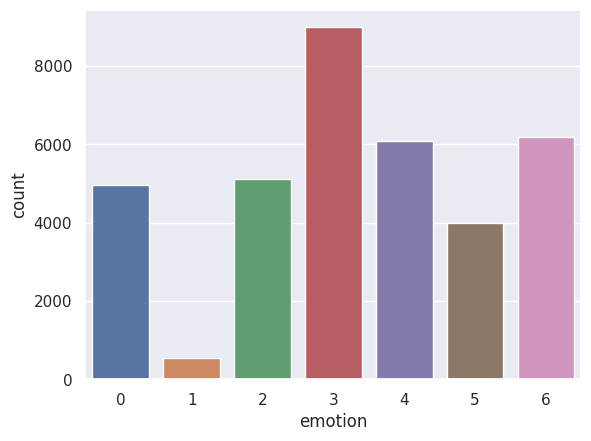

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emotion", data=data)

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='auto')

x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1), y_data)
print(x_data.shape," ",y_data.shape)

(62923, 1)   (62923,)


In [ ]:
y_data.value_counts()

0    8989
2    8989
4    8989
6    8989
3    8989
5    8989
1    8989
Name: emotion, dtype: int64

In [ ]:
x_data = pd.Series(x_data.flatten())
x_data

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
62918    108 87 101 113 125 132 149 167 182 186 185 186...
62919    7 5 2 1 0 13 21 33 57 72 149 102 52 30 23 62 1...
62920    15 16 19 19 22 37 37 145 131 43 32 25 49 69 75...
62921    149 151 134 137 128 110 121 124 126 137 138 13...
62922    177 176 175 173 177 149 84 45 47 43 41 36 38 4...
Length: 62923, dtype: object

In [ ]:
x_data = np.array(list(map(str.split, x_data)), np.float32)
x_data/=255
x_data[:10]

array([[0.27450982, 0.3137255 , 0.32156864, ..., 0.41568628, 0.42745098,
        0.32156864],
       [0.5921569 , 0.5882353 , 0.5764706 , ..., 0.75686276, 0.7176471 ,
        0.72156864],
       [0.90588236, 0.83137256, 0.6117647 , ..., 0.34509805, 0.43137255,
        0.59607846],
       ...,
       [0.3019608 , 0.30588236, 0.30980393, ..., 0.49019608, 0.2627451 ,
        0.26666668],
       [0.33333334, 0.32941177, 0.3529412 , ..., 0.22745098, 0.28627452,
        0.32941177],
       [1.        , 0.99607843, 1.        , ..., 0.99607843, 1.        ,
        1.        ]], dtype=float32)

In [ ]:
x_data = x_data.reshape(-1, 48, 48, 1)
x_data.shape

(62923, 48, 48, 1)

In [ ]:
y_data = np.array(y_data)
y_data = y_data.reshape(y_data.shape[0], 1)
y_data.shape

(62923, 1)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

# Split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Check that each split contains all seven classes
train_classes = np.unique(y_train)
val_classes = np.unique(y_valid)
test_classes = np.unique(y_test)

print("Training set classes: ", train_classes)
print("Validation set classes: ", val_classes)
print("Testing set classes: ", test_classes)

Training set classes:  [0 1 2 3 4 5 6]
Validation set classes:  [0 1 2 3 4 5 6]
Testing set classes:  [0 1 2 3 4 5 6]


In [ ]:
# Print the sizes of each dataset
print("Training set size: ", len(X_train))
print("Validation set size: ", len(X_valid))
print("Testing set size: ", len(X_test))

Training set size:  35236
Validation set size:  8810
Testing set size:  18877


In [ ]:
print(X_test.shape)
print(y_test.shape)
print(X_valid.shape)
print(y_valid.shape)

(18877, 48, 48, 1)
(18877, 1)
(8810, 48, 48, 1)
(8810, 1)


In [ ]:
model = Sequential([
    Input((48, 48, 1)),
    Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    Conv2D(64, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), strides=(1,1), padding = 'valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    Conv2D(128, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), strides=(1,1), padding = 'valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Reshape((-1,128)),
    (LSTM(128)),
    (Reshape((-1,64))),
    LSTM(64),
#     (Reshape((-1,64)))
#     (LSTM(32))
    Dense(200, activation='relu'),
    Dropout(0.6),
    Dense(7, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 46, 46, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 46, 46, 64)        0

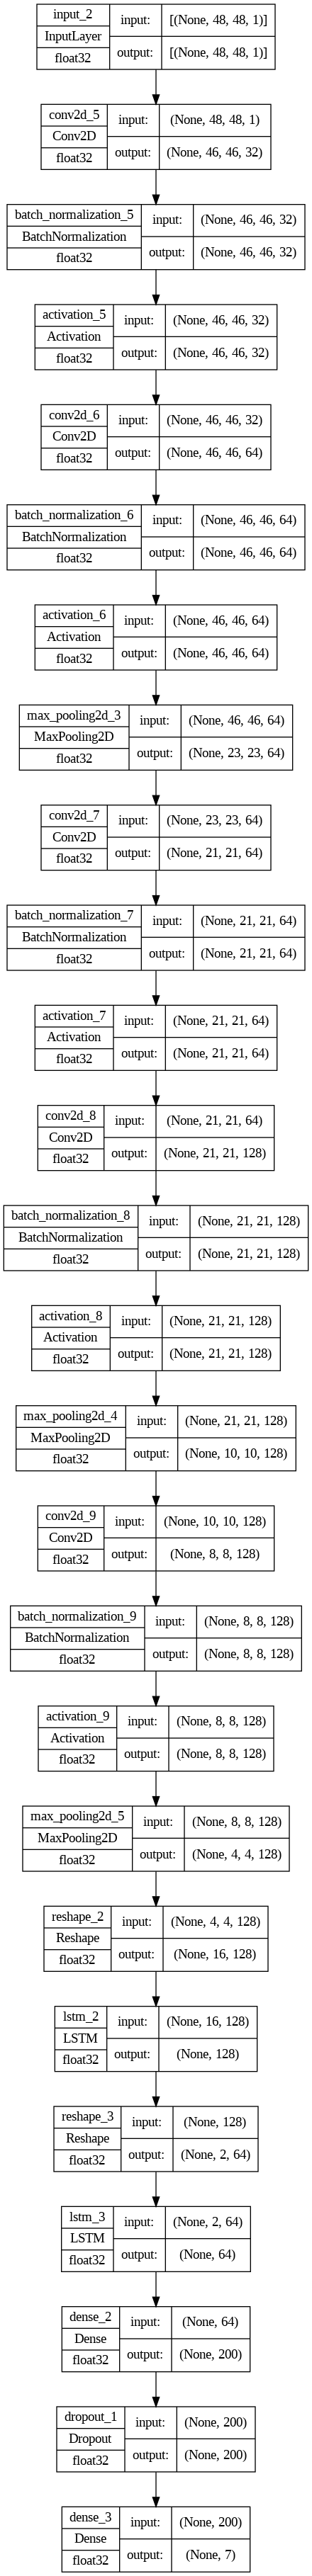

In [ ]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes = True, show_dtype = True)

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train = np_utils.to_categorical(y_train, 7)
y_train.shape

(35236, 7)

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=7)
y_valid = keras.utils.to_categorical(y_valid, num_classes=7)
y_test = keras.utils.to_categorical(y_test, num_classes=7)

In [ ]:
print(y_train)
print(y_test)
print(y_valid)

[[[0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 ...

 [[1. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]]
[[0. 0. 0.

In [ ]:
y_test = np_utils.to_categorical(y_test, 7)
y_test.shape

(18877, 7, 7)

In [ ]:
history = model.fit(X_train, y_train, epochs = 100,verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
1102/1102 [==============================] - 30s 20ms/step - loss: 1.6061 - accuracy: 0.3703 - val_loss: 1.4509 - val_accuracy: 0.4407
Epoch 2/100
1102/1102 [==============================] - 20s 18ms/step - loss: 1.1811 - accuracy: 0.5447 - val_loss: 1.1709 - val_accuracy: 0.5412
Epoch 3/100
1102/1102 [==============================] - 22s 20ms/step - loss: 1.0138 - accuracy: 0.6167 - val_loss: 1.1750 - val_accuracy: 0.5532
Epoch 4/100
1102/1102 [==============================] - 22s 20ms/step - loss: 0.8985 - accuracy: 0.6629 - val_loss: 1.0707 - val_accuracy: 0.6044
Epoch 5/100
1102/1102 [==============================] - 20s 18ms/step - loss: 0.7911 - accuracy: 0.7079 - val_loss: 0.9395 - val_accuracy: 0.6484
Epoch 6/100
1102/1102 [==============================] - 22s 20ms/step - loss: 0.6834 - accuracy: 0.7541 - val_loss: 1.1194 - val_accuracy: 0.6006
Epoch 7/100
1102/1102 [==============================] - 20s 18ms/step - loss: 0.5960 - accuracy: 0.7894 - val_loss: 1

In [ ]:
print("Accuracy of our model on validation data : " , model.evaluate(X_valid,y_valid)[1]*100 , "%")

276/276 [==============================] - 2s 7ms/step - loss: 1.6889 - accuracy: 0.7737
Accuracy of our model on validation data :  77.3666262626648 %


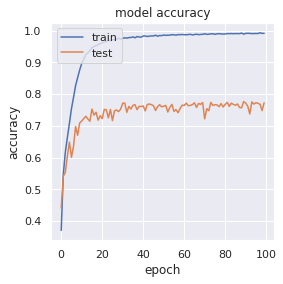

In [ ]:

cm = plt.figure(figsize = (4,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
cm.savefig("model_acc")
plt.show()

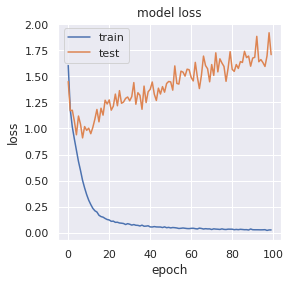

In [ ]:
# summarize history for loss
cm = plt.figure(figsize = (4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
cm.savefig("model_loss")
plt.show()

In [ ]:
y_pred = model.predict(X_valid)
y_result = []

for pred in y_pred:
    y_result.append(np.argmax(pred))
y_result[:10]

276/276 [==============================] - 3s 6ms/step


[6, 6, 4, 6, 0, 0, 5, 0, 5, 2]

In [ ]:
y_actual = []

for pred in y_valid:
    y_actual.append(np.argmax(pred))
y_actual[:10]

[4, 6, 4, 6, 0, 3, 5, 0, 5, 2]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_result))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1222
           1       0.98      1.00      0.99      1257
           2       0.71      0.71      0.71      1276
           3       0.83      0.71      0.76      1260
           4       0.73      0.59      0.65      1279
           5       0.86      0.90      0.88      1293
           6       0.61      0.76      0.68      1223

    accuracy                           0.77      8810
   macro avg       0.78      0.77      0.77      8810
weighted avg       0.78      0.77      0.77      8810



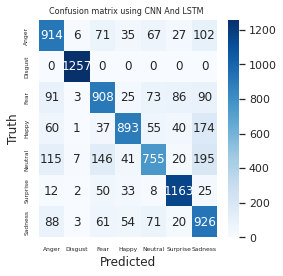

In [ ]:
# import seaborn as sn
# cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_result)

# plt.figure(figsize = (6,4))
# sn.heatmap(cm,cmap="Purples", annot = True, fmt = 'd')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.savefig("confusion")

import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_result)

plt.figure(figsize = (4,4))
ax = plt.axes()
sn.heatmap(cm,cmap="Blues", annot = True, fmt = 'd')
ax.xaxis.set_ticklabels([  "Anger", "Disgust", "Fear", "Happy", "Neutral","Surprise","Sadness"], fontsize=6);
ax.yaxis.set_ticklabels([  "Anger", "Disgust", "Fear", "Happy", "Neutral","Surprise","Sadness"],  fontsize=6);

plt.title('Confusion matrix using CNN And LSTM ', fontsize = 8, fontweight=500)
plt.xlabel('Predicted')
plt.ylabel('Truth')


plt.savefig("confusion")

In [ ]:
# Save the model to a file
model.save('/content/drive/MyDrive/Datasets/model.h5')

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image


def predict_class(image_path, model):
    """
    This function takes an image path and a pre-trained DCNN model, preprocesses the image, and returns the predicted class number.
    """
    img = image.load_img(image_path, target_size=(48, 48))
    img_gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)  # convert image to grayscale
    x = np.expand_dims(img_gray, axis=-1)  # add channel dimension
    x = x/255.0  # rescale the pixel values to [0, 1]
    x = np.expand_dims(x, axis=0)  # add batch dimension
    preds = model.predict(x)
    class_num = np.argmax(preds, axis=1)[0]
    return class_num

print([  "Anger", "Disgust", "Fear", "Happy", "Sadness","Surprise","Neutral"])
model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/model.h5')
print("anger", predict_class(r'/content/a.jpg', model))
print("fear", predict_class(r'/content/f.jpg', model))
print("disgust", predict_class(r'/content/d.jpg', model))
print("sad", predict_class(r'/content/s (2).jpg', model))
print("sur", predict_class(r'/content/sr (1).jpg', model))
print("hap", predict_class(r'/content/h (1).jpg', model))
print("nea", predict_class(r'/content/n (2).jpg', model))

['Anger', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise', 'Neutral']
1/1 [==============================] - 1s 1s/step
anger 0
1/1 [==============================] - 0s 22ms/step
fear 2
1/1 [==============================] - 0s 21ms/step
disgust 1
1/1 [==============================] - 0s 25ms/step
sad 4
1/1 [==============================] - 0s 22ms/step
sur 5
1/1 [==============================] - 0s 21ms/step
hap 3
1/1 [==============================] - 0s 22ms/step
nea 6


In [ ]:
import h5py
from keras.models import load_model
model = load_model('/content/model.h5')



In [ ]:
from PIL import Image
from numpy import asarray

img = Image.open('Sample.png')

numpydata = asarray(img)
x_data = x_data.reshape(-1, 48, 48, 1)